In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_2.csv')
fla.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,PctOfGuarantee,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"TARCA, INC..",3754 NW 54TH STREET,MIAMI,FL,33142,308,CHGOFF,1900000,1425000,0.75,...,423120,Motor Vehicle Supplies and New Parts Merchant ...,5,OTH 7A,Guaranty,TotalBank,100 SE 2nd St,MIAMI,FL,33131
1,Around the Clock Fitness,1242 SW Pine Island.,Cape coral,FL,33991,8127,PIF,521800,469620,0.90,...,713990,All Other Amusement and Recreation Industries,20,PLP,Guaranty,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042
2,"Integrated Metering Systems, I","11701 South Belcher Road, Sui",Largo,FL,33773,4025,PIF,40800,34680,0.85,...,335311,"Power, Distribution, and Specialty Transformer...",23,PLP,Guaranty,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901
3,Loving Enterprises Inc and 2 P,7885 Boca Ciega Drive,SAINT PETERSBURG,FL,33706,7228,PIF,332000,249000,0.75,...,453220,"Gift, Novelty, and Souvenir Stores",21,PLP,Guaranty,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801
4,Lawrence J. Roberts & Associat,249 Catalonia Avenue.,Coral gables,FL,33134,1508,EXEMPT,225000,112500,0.50,...,541110,Offices of Lawyers,3,SBA EXPRES,FA$TRK (Small Loan Express),TotalBank,100 SE 2nd St,MIAMI,FL,33131


In [117]:
# X used "LoanStatus", "SBAGuarantee",
X = fla[["PctOfGuarantee","DebtCoverage", "Leverage", "PctOfPrinColl","GrossApproval" ]]
y = fla["SBAGuarantee"]
print(X.shape, y.shape)

(15137, 5) (15137,)


In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

X_train.head()

,PctOfGuarantee,DebtCoverage,Leverage,PctOfPrinColl,GrossApproval
1229,0.75,1.50,3.50,0.30,1105500
5224,0.50,1.75,3.25,0.30,348300
7961,0.50,1.40,5.00,0.30,100000
11026,0.75,1.00,4.00,0.35,3465000
4240,0.85,2.25,4.00,1.00,50000


In [141]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="orange", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="purple", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Projected Charge Off Amount for Performing Loans")
# plt.show()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
round(sum(model.predict(X_test) - y_test), 2)

2332354.5099999998

In [143]:
predict1= model.predict(X_test)

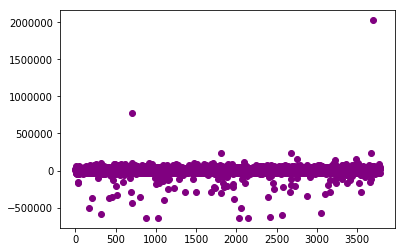

In [144]:
plt.scatter(range(0, len(y_test)), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.show()

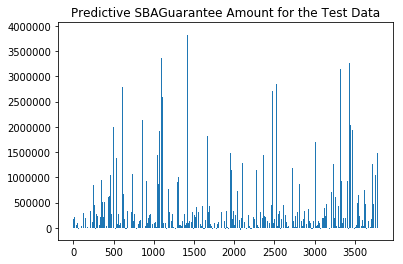

In [176]:
plt.bar(range(0, len(y_test)), predict1,  label="Testing Data")
plt.title("Predictive SBAGuarantee Amount for the Test Data")
plt.show()



In [178]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 799168242142.0328, R2: 0.990015015017393


In [150]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

model = Lasso(alpha=.7)
model.fit(X_train, y_train)
sum(model.predict(X_test) - y_test)


2328346.5215211636

In [151]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

model = Ridge(alpha=.7)
model.fit(X_train, y_train)
sum(model.predict(X_test) - y_test)


2332354.5138449953

In [152]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

model3 = ElasticNet(alpha=.7)
model3.fit(X_train, y_train)
sum(model3.predict(X_test) - y_test)


3289303.1315399841